In [1]:
# install
!pip install pmdarima
!pip install surprise

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357267 sha256=49d4af19eab6ce641afd4a21e5861c0b05f34e42dca4bf58e987de7d91b9e45e
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [2]:
# Import Packages
import pandas as pd
import numpy as np

In [4]:
# Reading the dataset
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
csvFile = "/content/gdrive/MyDrive/Colab Notebooks/kz.csv"

# reading the csv file to different variables
df_data = pd.read_csv(csvFile)
data2 = pd.read_csv(csvFile)
data = pd.read_csv(csvFile)
data3 = pd.read_csv(csvFile)

Mounted at /content/gdrive


In [5]:
# Loading the dataset
df_data['event_time'] = df_data['event_time'].replace(" UTC","", regex=True)
df_data['event_time'] = pd.to_datetime(df_data['event_time'])
df_data

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
4,2020-04-24 19:16:21,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18
...,...,...,...,...,...,...,...,...
2633516,2020-11-21 10:10:01,2388440981134693942,1515966223526602848,2.268105e+18,electronics.smartphone,oppo,138.87,1.515916e+18
2633517,2020-11-21 10:10:13,2388440981134693943,1515966223509089282,2.268105e+18,electronics.smartphone,apple,418.96,1.515916e+18
2633518,2020-11-21 10:10:30,2388440981134693944,1515966223509089917,2.268105e+18,appliances.personal.scales,vitek,12.48,1.515916e+18
2633519,2020-11-21 10:10:30,2388440981134693944,2273948184839454837,2.268105e+18,NaN,moulinex,41.64,1.515916e+18


In [6]:
# Data transaformation
# Split the categories into sub categories
df_data[['l1_cat', 'l2_cat', 'l3_cat']] = df_data['category_code'].str.split('.',expand=True)

df_data

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,l1_cat,l2_cat,l3_cat
0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,electronics,tablet,None
1,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,electronics,tablet,None
2,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,electronics,audio,headphone
3,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,electronics,audio,headphone
4,2020-04-24 19:16:21,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2633516,2020-11-21 10:10:01,2388440981134693942,1515966223526602848,2.268105e+18,electronics.smartphone,oppo,138.87,1.515916e+18,electronics,smartphone,None
2633517,2020-11-21 10:10:13,2388440981134693943,1515966223509089282,2.268105e+18,electronics.smartphone,apple,418.96,1.515916e+18,electronics,smartphone,None
2633518,2020-11-21 10:10:30,2388440981134693944,1515966223509089917,2.268105e+18,appliances.personal.scales,vitek,12.48,1.515916e+18,appliances,personal,scales
2633519,2020-11-21 10:10:30,2388440981134693944,2273948184839454837,2.268105e+18,NaN,moulinex,41.64,1.515916e+18,NaN,NaN,NaN


In [7]:
# Describe Data + some data cleaning
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633521 entries, 0 to 2633520
Data columns (total 11 columns):
 #   Column         Dtype         
---  ------         -----         
 0   event_time     datetime64[ns]
 1   order_id       int64         
 2   product_id     int64         
 3   category_id    float64       
 4   category_code  object        
 5   brand          object        
 6   price          float64       
 7   user_id        float64       
 8   l1_cat         object        
 9   l2_cat         object        
 10  l3_cat         object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 221.0+ MB


In [8]:
df_data.describe()

,event_time,order_id,product_id,category_id,price,user_id
count,2633521,2.633521e+06,2.633521e+06,2.201567e+06,2.201567e+06,5.641690e+05
mean,2020-01-16 19:57:05.412119808,2.361783e+18,1.674080e+18,2.273827e+18,1.540932e+02,1.515916e+18
min,1970-01-01 00:33:40,2.294360e+18,1.515966e+18,2.268105e+18,0.000000e+00,1.515916e+18
25%,2020-03-05 15:42:44,2.348807e+18,1.515966e+18,2.268105e+18,1.456000e+01,1.515916e+18
50%,2020-06-08 08:33:27,2.353254e+18,1.515966e+18,2.268105e+18,5.553000e+01,1.515916e+18
75%,2020-08-24 06:52:14,2.383131e+18,1.515966e+18,2.268105e+18,1.967400e+02,1.515916e+18
max,2020-11-21 10:10:30,2.388441e+18,2.388434e+18,2.374499e+18,5.092590e+04,1.515916e+18
std,NaN,1.716538e+16,3.102249e+17,2.353247e+16,2.419421e+02,2.379057e+07


In [9]:
# calculate percentage of missing value
df_data.isnull().sum()/len(df_data)

,0
event_time,0.000000
order_id,0.000000
product_id,0.000000
category_id,0.164021
category_code,0.232465
brand,0.192140
price,0.164021
user_id,0.785774
l1_cat,0.232465
l2_cat,0.232465


In [10]:
print("Min Date: ", df_data['event_time'].min())
print("Max Date: ", df_data['event_time'].max())

Min Date:  1970-01-01 00:33:40
Max Date:  2020-11-21 10:10:30


In [11]:
df_data['year'] = df_data['event_time'].dt.year
df_data.groupby(['year'])['year'].count()

,year
year,
1970,19631
2020,2613890


In [12]:
df_data = df_data[df_data['year'] != 1970].reset_index(drop=True)

In [13]:
df_data = df_data[df_data['user_id'].notna()].reset_index(drop=True)

In [14]:
# Handling missing price values
products_median_prices = df_data.groupby(['product_id'])['price'].median().reset_index()
products_median_prices = pd.Series(df_data['price'].values, index=df_data['product_id']).to_dict()

# fill in missing prices with the median
df_data['price'] = df_data['price'].fillna(df_data['product_id'].map(products_median_prices))
df_data['price'].isna().sum()

0

In [15]:
# Import libraries - 3
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# suppress scientific notation
np.set_printoptions(suppress=True)
pd.options.display.float_format = '{:.2f}'.format

In [16]:
data.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2268105426648171008.00,electronics.tablet,samsung,162.01,1515915625441993984.00
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2268105426648171008.00,electronics.tablet,samsung,162.01,1515915625441993984.00
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2268105430162997760.00,electronics.audio.headphone,huawei,77.52,1515915625447879424.00
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2268105430162997760.00,electronics.audio.headphone,huawei,77.52,1515915625447879424.00
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2268105471367840000.00,NaN,karcher,217.57,1515915625443148032.00


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633521 entries, 0 to 2633520
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   order_id       int64  
 2   product_id     int64  
 3   category_id    float64
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        float64
dtypes: float64(3), int64(2), object(3)
memory usage: 160.7+ MB


In [18]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
event_time,2633521,1316174,1970-01-01 00:33:40 UTC,19631,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_id,2633521.00,NaN,NaN,NaN,2361782829757762048.00,17165379778976542.00,2294359932054536960.00,2348807245233390080.00,2353253589415100416.00,2383131118955135488.00,2388440981134693888.00
product_id,2633521.00,NaN,NaN,NaN,1674080384807513600.00,310224921942725248.00,1515966223509088512.00,1515966223509116160.00,1515966223509611520.00,1515966223523309824.00,2388434452476881920.00
category_id,2201567.00,NaN,NaN,NaN,2273827014269330176.00,23532467048797852.00,2268105388421284352.00,2268105406750393344.00,2268105428166509056.00,2268105441856717568.00,2374498914001945600.00
category_code,2021319,510,electronics.smartphone,357682,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,2127516,23021,samsung,358928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,2201567.00,NaN,NaN,NaN,154.09,241.94,0.00,14.56,55.53,196.74,50925.90
user_id,564169.00,NaN,NaN,NaN,1515915625486184960.00,23790565.29,1515915625439952128.00,1515915625467185664.00,1515915625486696960.00,1515915625511581440.00,1515915625514891264.00


In [19]:
# Data preprocessing
data = data.drop_duplicates()

In [20]:
data.isnull().sum()

,0
event_time,0
order_id,0
product_id,0
category_id,431953
category_code,612053
brand,505965
price,431953
user_id,2069351


In [21]:
# Filter rows where 'event_time' contains '1970'
filtered_df = data[data['event_time'].str.contains('1970')]

filtered_df

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
28813,1970-01-01 00:33:40 UTC,2340102742254551453,1515966223509354098,2268105644970082560.00,NaN,pastel,53.22,NaN
28814,1970-01-01 00:33:40 UTC,2340102742439100830,1515966223509117074,2268105427872907776.00,NaN,samsung,30.07,NaN
28815,1970-01-01 00:33:40 UTC,2340102742439100830,1515966223509089955,2268105441009468160.00,appliances.kitchen.meat_grinder,moulinex,57.85,NaN
28816,1970-01-01 00:33:40 UTC,2340102742439100830,1515966223509297118,2268105392925967104.00,appliances.environment.air_heater,ava,48.59,NaN
28817,1970-01-01 00:33:40 UTC,2340102742439100830,1515966223509088552,2268105428166509056.00,electronics.smartphone,samsung,196.27,NaN
...,...,...,...,...,...,...,...,...
55943,1970-01-01 00:33:40 UTC,2348533156149199497,1515966223511370167,2268105446034244352.00,NaN,NaN,3.91,NaN
55944,1970-01-01 00:33:40 UTC,2348533156149199497,2273948223032787798,2268105446034244352.00,NaN,NaN,2.29,NaN
55945,1970-01-01 00:33:40 UTC,2348533156149199497,2273948223032787800,2268105446034244352.00,NaN,NaN,10.16,NaN
55946,1970-01-01 00:33:40 UTC,2348533156308583050,1515966223527009158,NaN,4.63,NaN,NaN,NaN


In [22]:
# exclude rows where 'event_time' contains '1970'
data = data[~data['event_time'].str.contains('1970')]
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
event_time,2613215,1316173,2020-04-09 16:30:01 UTC,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_id,2613215.00,NaN,NaN,NaN,2361898823701765632.00,17170329471123940.00,2294359932054536960.00,2348808120123261952.00,2353254599067960320.00,2383131603690849280.00,2388440981134693888.00
product_id,2613215.00,NaN,NaN,NaN,1673993996657965568.00,310177500587615040.00,1515966223509088512.00,1515966223509116160.00,1515966223509611520.00,1515966223523548672.00,2388434452476881920.00
category_id,2185340.00,NaN,NaN,NaN,2273821966023597056.00,23520137742089068.00,2268105388421284352.00,2268105406750393344.00,2268105428166509056.00,2268105441856717568.00,2374498914001945600.00
category_code,2006141,509,electronics.smartphone,354747,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,2111921,22955,samsung,356346,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,2185340.00,NaN,NaN,NaN,154.19,242.02,0.00,14.56,55.53,196.74,50925.90
user_id,562188.00,NaN,NaN,NaN,1515915625486215168.00,23805708.42,1515915625439952128.00,1515915625467175424.00,1515915625486698496.00,1515915625511599104.00,1515915625514891264.00


In [23]:
# remove empty rows in brand and user_id columns
data = data.dropna(subset=['brand', 'user_id']).reset_index(drop=True)
data.isnull().sum()

,0
event_time,0
order_id,0
product_id,0
category_id,0
category_code,115675
brand,0
price,0
user_id,0


In [24]:
# split the category_code column into category and product columns
data[['category', 'product']] = data['category_code'].str.split('.', n=1, expand=True)

# fill empty cells in the new category and product columns with unknown
data['category'].fillna('unknown', inplace=True)
data['product'].fillna('unknown', inplace=True)

# drop the category_code column
data.drop('category_code', axis=1, inplace=True)

data.tail()

,event_time,order_id,product_id,category_id,brand,price,user_id,category,product
535060,2020-11-21 10:10:01 UTC,2388440981134693942,1515966223526602848,2268105428166509056.00,oppo,138.87,1515915625514888704.00,electronics,smartphone
535061,2020-11-21 10:10:13 UTC,2388440981134693943,1515966223509089282,2268105428166509056.00,apple,418.96,1515915625514891264.00,electronics,smartphone
535062,2020-11-21 10:10:30 UTC,2388440981134693944,1515966223509089917,2268105402447037440.00,vitek,12.48,1515915625514834176.00,appliances,personal.scales
535063,2020-11-21 10:10:30 UTC,2388440981134693944,2273948184839454837,2268105440371933952.00,moulinex,41.64,1515915625514834176.00,unknown,unknown
535064,2020-11-21 10:10:30 UTC,2388440981134693944,1515966223509127566,2268105441101742848.00,redmond,53.22,1515915625514834176.00,appliances,kitchen.blender


In [25]:
data['category_id'] = data['category_id'].astype('int64')
data['user_id'] = data['user_id'].astype('int64')

In [26]:
# remove UTC from event_time
data['event_time'] = data['event_time'].str.replace('UTC', '')

# create date column
data['date'] = data.event_time.apply(lambda x: x.split(' ')[0])

# convert to datetime object
data['date'] = pd.to_datetime(data['date'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535065 entries, 0 to 535064
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   event_time   535065 non-null  object        
 1   order_id     535065 non-null  int64         
 2   product_id   535065 non-null  int64         
 3   category_id  535065 non-null  int64         
 4   brand        535065 non-null  object        
 5   price        535065 non-null  float64       
 6   user_id      535065 non-null  int64         
 7   category     535065 non-null  object        
 8   product      535065 non-null  object        
 9   date         535065 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 40.8+ MB


In [27]:
data.head()

,event_time,order_id,product_id,category_id,brand,price,user_id,category,product,date
0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2268105426648171008,samsung,162.01,1515915625441993984,electronics,tablet,2020-04-24
1,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2268105430162997760,huawei,77.52,1515915625447879424,electronics,audio.headphone,2020-04-24
2,2020-04-24 19:16:21,2294584263154074236,2273948316817424439,2268105471367840000,karcher,217.57,1515915625443148032,unknown,unknown,2020-04-24
3,2020-04-26 08:45:57,2295716521449619559,1515966223509261697,2268105442636858112,maestro,39.33,1515915625450382848,furniture,kitchen.table,2020-04-26
4,2020-04-26 09:33:47,2295740594749702229,1515966223509104892,2268105428166509056,apple,1387.01,1515915625448766464,electronics,smartphone,2020-04-26


In [28]:
# create new columns - date, month, hour and day_of_week
data['month'] = data.date.dt.strftime('%b')
data['month_num'] = data.date.dt.month

data['week_day'] = data.date.dt.strftime('%a')
data['week_day_num'] = data.date.apply(lambda x: x.strftime('%w')).astype('int64')

data['hour'] = data.event_time.apply(lambda x: x.split(' ')[1].split(':')[0]).astype('int64')

del data['event_time']

data.head()

,order_id,product_id,category_id,brand,price,user_id,category,product,date,month,month_num,week_day,week_day_num,hour
0,2294359932054536986,1515966223509089906,2268105426648171008,samsung,162.01,1515915625441993984,electronics,tablet,2020-04-24,Apr,4,Fri,5,11
1,2294444024058086220,2273948319057183658,2268105430162997760,huawei,77.52,1515915625447879424,electronics,audio.headphone,2020-04-24,Apr,4,Fri,5,14
2,2294584263154074236,2273948316817424439,2268105471367840000,karcher,217.57,1515915625443148032,unknown,unknown,2020-04-24,Apr,4,Fri,5,19
3,2295716521449619559,1515966223509261697,2268105442636858112,maestro,39.33,1515915625450382848,furniture,kitchen.table,2020-04-26,Apr,4,Sun,0,8
4,2295740594749702229,1515966223509104892,2268105428166509056,apple,1387.01,1515915625448766464,electronics,smartphone,2020-04-26,Apr,4,Sun,0,9


In [29]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
order_id,535065.00,2370567694359658496.00,2294359932054536960.00,2354295804434317824.00,2376796926830969856.00,2388440981134596608.00,2388440981134693888.00,20233627030242576.00
product_id,535065.00,1692647560995175168.00,1515966223509088512.00,1515966223509104896.00,1515966223509261824.00,1515966223527326208.00,2388434452476881920.00,327307231759627520.00
category_id,535065.00,2273071589655354368.00,2268105388421284352.00,2268105406549066752.00,2268105428166509056.00,2268105439323357952.00,2374498914001945600.00,21897673743827516.00
price,535065.00,214.71,0.00,24.98,99.51,289.33,11574.05,306.01
user_id,535065.00,1515915625486156800.00,1515915625439952128.00,1515915625466993664.00,1515915625486697984.00,1515915625511534592.00,1515915625514891264.00,23793646.70
date,535065,2020-08-07 01:08:19.383812608,2020-01-05 00:00:00,2020-06-28 00:00:00,2020-08-16 00:00:00,2020-10-09 00:00:00,2020-11-21 00:00:00,NaN
month_num,535065.00,7.73,1.00,6.00,8.00,10.00,11.00,2.54
week_day_num,535065.00,3.03,0.00,1.00,3.00,5.00,6.00,2.04
hour,535065.00,9.54,0.00,6.00,9.00,12.00,23.00,4.19


In [30]:
# General Analysis
# total unique users
total_users = data['user_id'].nunique()
print(f'The total unique users in the dataset are: {total_users: 0,}')

The total unique users in the dataset are:  97,098


In [31]:
# total unique orders
total_orders = data['order_id'].nunique()
print(f'The total unique orders in the dataset are: {total_orders: 0,}')

The total unique orders in the dataset are:  388,742


In [32]:
# total sales
total_sales = round(data['price'].sum())
print(f'The total sales in $ is: {total_sales: 0,}')

The total sales in $ is:  114,881,330


In [33]:
# Time Analysis
df_month = data.groupby(['month_num', 'month']).agg(
    total_users=('user_id', 'nunique'),
    total_orders=('order_id', 'nunique'),
    total_sales= ('price', 'sum')
).sort_values(by='month_num', ascending=True).reset_index(level='month_num', drop=True)

df_month = df_month.reset_index()
df_month

,month,total_users,total_orders,total_sales
0,Jan,1823,9201,1729464.93
1,Feb,2259,11026,2216672.31
2,Mar,2606,11676,2841015.58
3,Apr,5495,8752,1669080.19
4,May,17527,29644,7644255.82
5,Jun,14059,28073,7486680.81
6,Jul,30628,56363,16019735.90
7,Aug,35989,72370,27362298.79
8,Sep,20062,49759,16785757.14
9,Oct,14736,68405,19361987.48


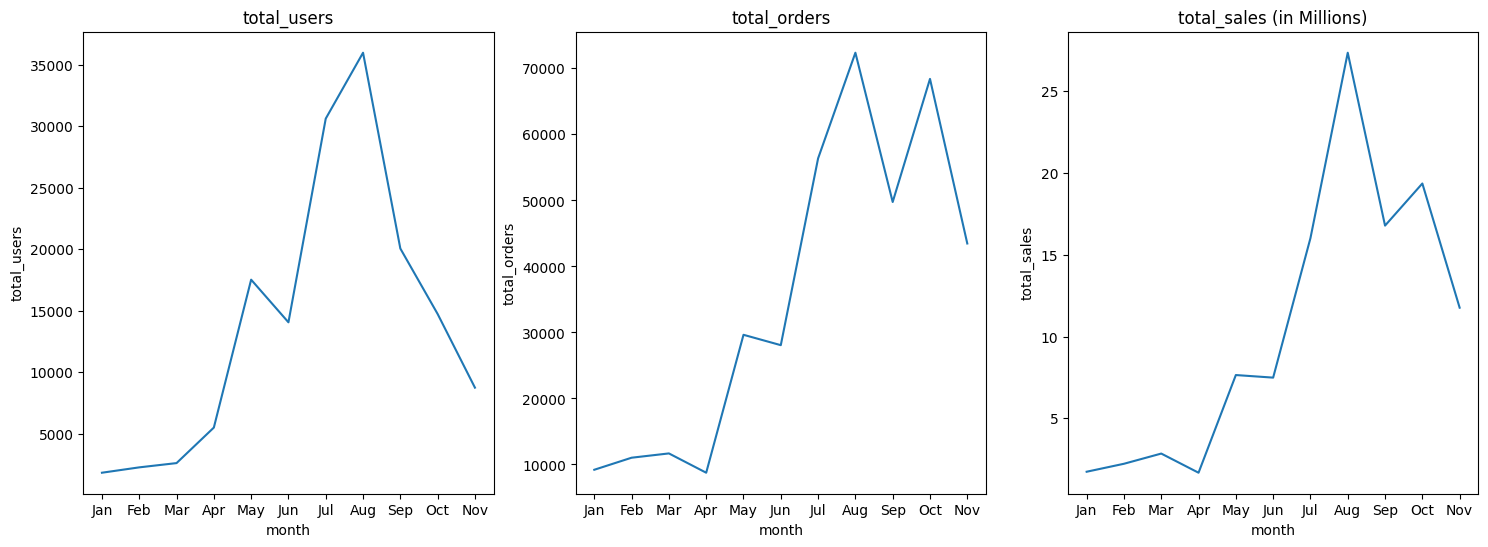

In [34]:
plt.figure(figsize=(18, 6))

for i, col in enumerate(df_month.columns):
  if col != 'month':
    fig = plt.subplot(1, 3, i)
    sns.lineplot(data=df_month, x='month', y=col, )
    plt.title(f'{col}')

    if col == 'total_sales':
      fig.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

      # after plotting the data, format the labels
      current_values = plt.gca().get_yticks()

      plt.gca().set_yticklabels(['{:,.0f}'.format(x/1000000) for x in current_values])
      plt.title(f'{col} (in Millions)')

plt.show()

In [35]:
# Weekly Analysis
df_week = data.groupby(['week_day_num', 'week_day']).agg(
    total_users=('user_id', 'nunique'),
    total_orders=('order_id', 'nunique'),
    total_sales=('price', 'sum')
).sort_values(by='week_day_num', ascending=True).reset_index(level='week_day_num', drop=True)

df_week = df_week.reset_index()
df_week

,week_day,total_users,total_orders,total_sales
0,Sun,24037,56979,17222096.04
1,Mon,27212,53470,16223122.63
2,Tue,26665,55495,16127420.47
3,Wed,25323,55514,15897601.88
4,Thu,24690,54211,15462231.02
5,Fri,25295,51655,15719070.48
6,Sat,25027,61418,18229787.55


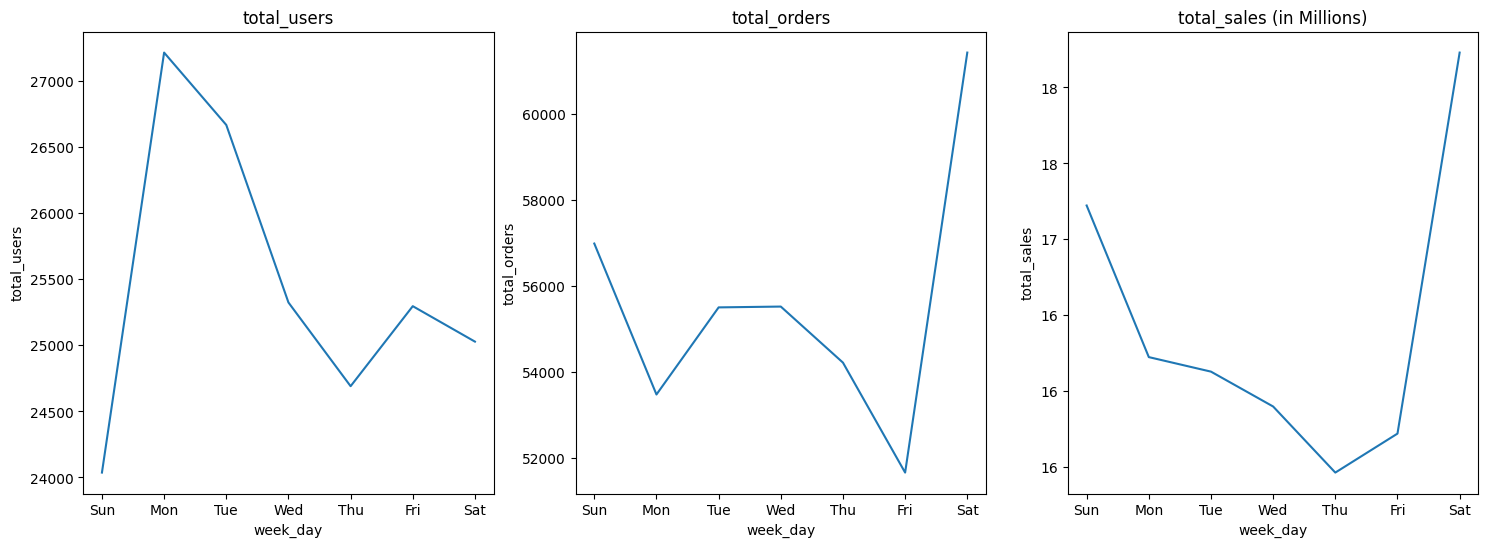

In [36]:
plt.figure(figsize=(18, 6))

for i, col in enumerate(df_week.columns):

    if col != 'week_day':

        fig = plt.subplot(1, 3, i)
        sns.lineplot(data=df_week, x='week_day', y=col, )
        plt.title(f'{col}')

        if col == 'total_sales':

            fig.get_yaxis().set_major_formatter(
            matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

            # after plotting the data, format the labels
            current_values = plt.gca().get_yticks()

            plt.gca().set_yticklabels(['{:,.0f}'.format(x/1000000) for x in current_values])
            plt.title(f'{col} (in Millions)')

plt.show()

In [37]:
# Daily analysis
df_date = data.groupby('date').agg(
    total_users=('user_id', 'nunique'),
    total_orders=('order_id', 'nunique'),
    total_sales=('price', 'sum')
).reset_index()

df_date

,date,total_users,total_orders,total_sales
0,2020-01-05,105,426,77216.52
1,2020-01-06,89,411,61146.03
2,2020-01-07,99,497,82381.21
3,2020-01-08,62,300,56344.74
4,2020-01-09,83,319,58278.71
...,...,...,...,...
317,2020-11-17,542,711,274243.17
318,2020-11-18,1076,5231,1147987.30
319,2020-11-19,1004,5012,1124056.05
320,2020-11-20,485,573,266572.62


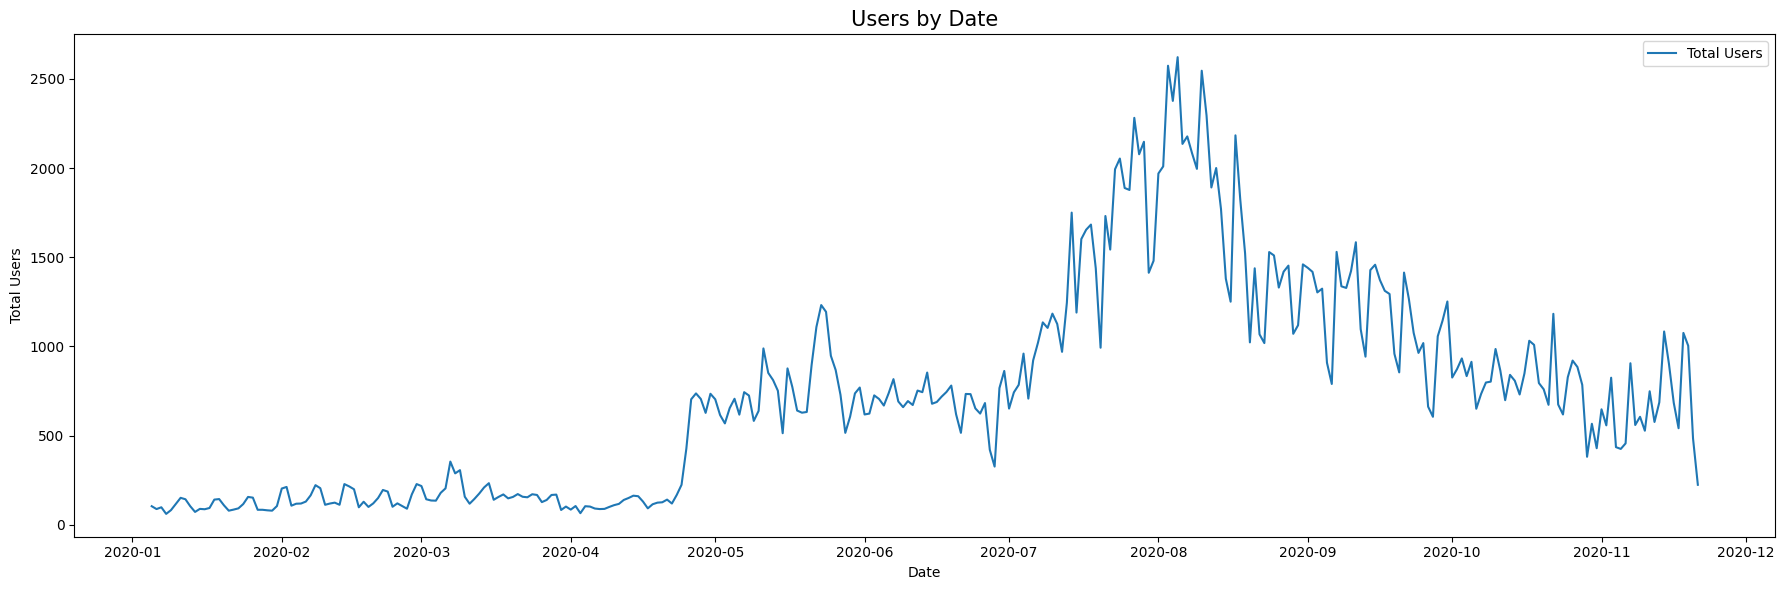

In [38]:
fig, ax = plt.subplots(figsize=(18, 6))
xticks = df_date.date

ax.plot(df_date.date, df_date['total_users'])

ax.set_xlabel('Date')
ax.set_ylabel('Total Users')

ax.legend(['Total Users'])
plt.title('Users by Date', fontsize=15)

plt.tight_layout()
plt.show()

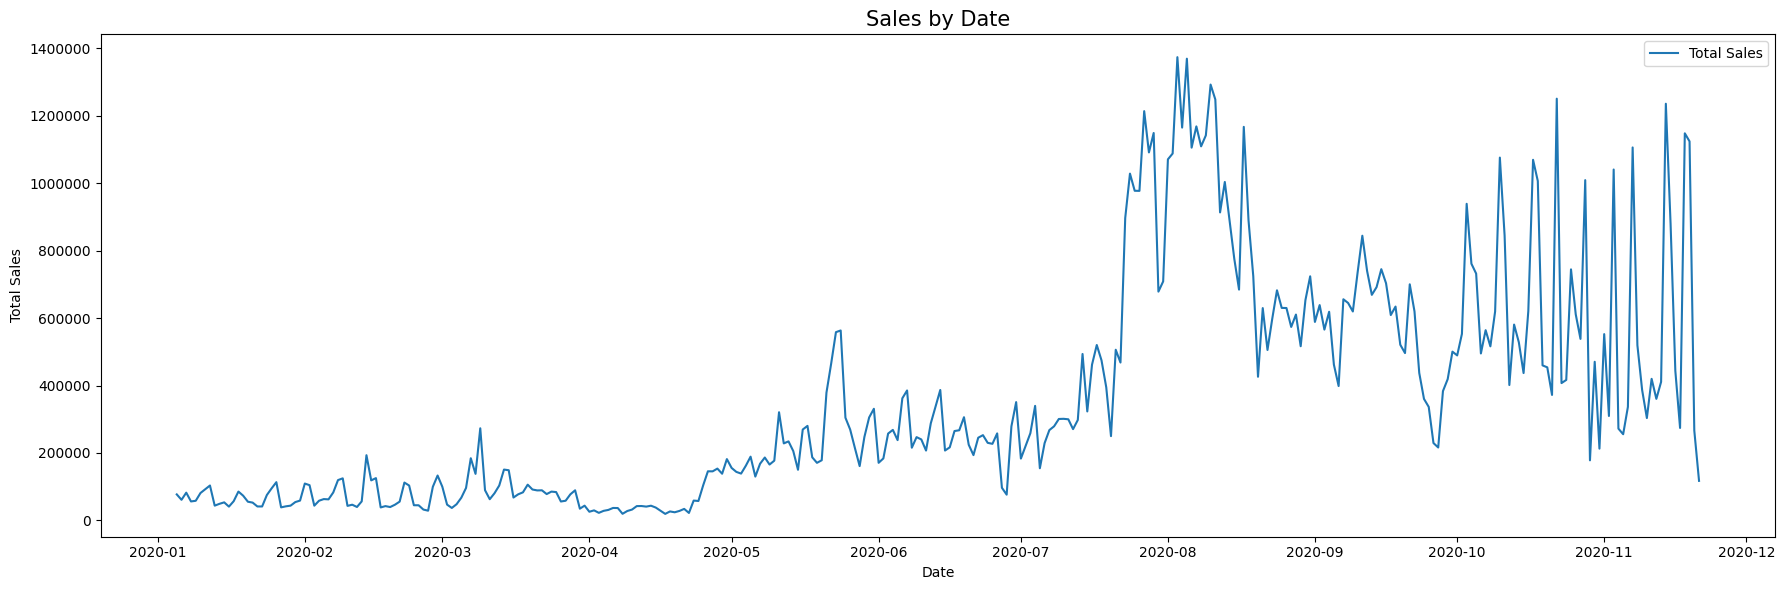

In [39]:
fig, ax = plt.subplots(figsize=(18, 6))
plt.ticklabel_format(style='plain')
xticks = df_date.date

ax.plot(df_date.date, df_date['total_sales'])

ax.set_xlabel('Date')
ax.set_ylabel('Total Sales')

ax.legend(['Total Sales'])
plt.title('Sales by Date', fontsize=15)

plt.tight_layout()
plt.show()

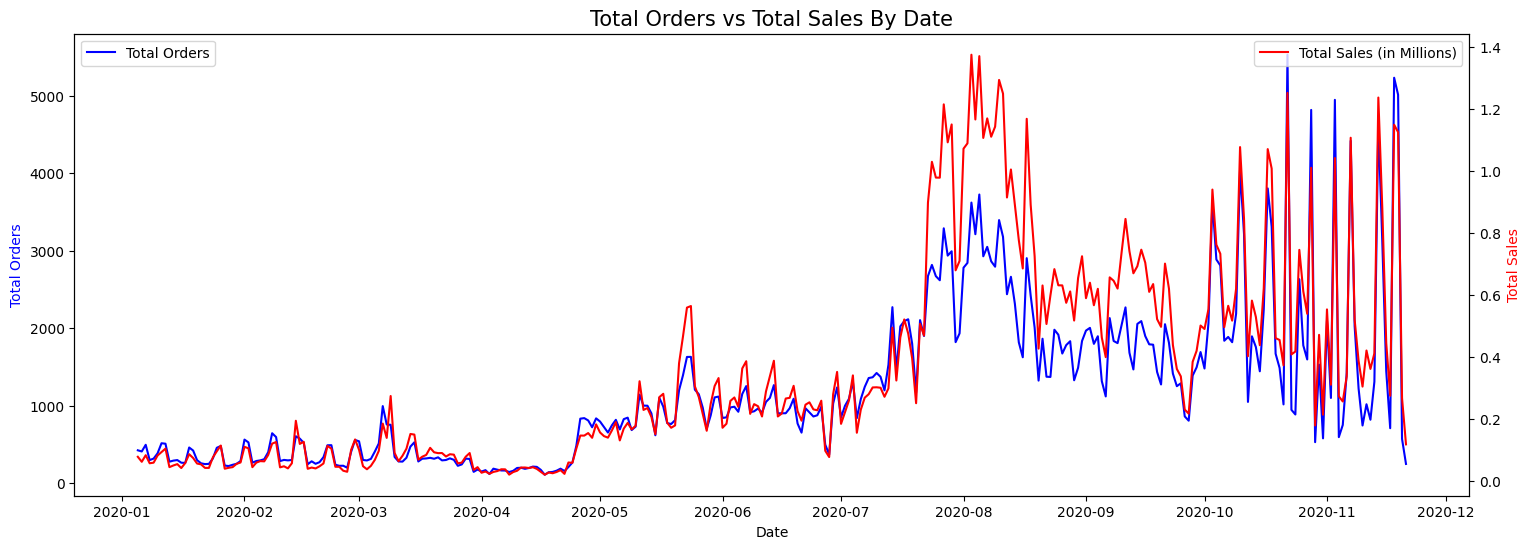

In [40]:
# Add a second y-axis
fig, ax1 = plt.subplots(figsize=(18, 6))
xticks = df_date.date

ax2 = ax1.twinx()
ax1.plot(df_date.date, df_date['total_orders'], color='b')
ax2.plot(df_date.date, df_date['total_sales'], color='r')

# format the second y-axis labels
ax2.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.1f}'.format(x/1000000) for x in current_values])

ax1.set_xlabel('Date')
ax1.set_ylabel('Total Orders', color='b')
ax2.set_ylabel('Total Sales', color='r')

ax1.legend(['Total Orders'], loc='upper left')
ax2.legend(['Total Sales (in Millions)'], loc='upper right')

plt.title('Total Orders vs Total Sales By Date', fontsize=15)

plt.show()

In [41]:
# Customer Analysis
# average customer spending
avg_user_rev = round(data['price'].sum() / data['user_id'].nunique())
print(f'The Average Customer Sales in $: {avg_user_rev: 0,}')

The Average Customer Sales in $:  1,183


In [42]:
# average customer orders
avg_user_orders = round(data['order_id'].nunique() / data['user_id'].nunique(), 0)
print(f'The average customer orders are: {avg_user_orders}')

The average customer orders are: 4.0


In [43]:
# average order value
avg_order_value = round(data['price'].sum() / data['order_id'].nunique())
print(f'The average order value in $: {avg_order_value}')

The average order value in $: 296


In [44]:
# top 20 customers
top_20_customers = data.groupby('user_id').agg(
    total_orders=('order_id', 'count'),
    total_sales=('price', 'sum')
).reset_index().sort_values('total_orders', ascending=False).head(20)
top_20_customers

,user_id,total_orders,total_sales
92893,1515915625512763648,603,120965.01
92894,1515915625512763904,597,109908.68
91873,1515915625512422656,553,86242.12
93042,1515915625512817152,551,101644.54
90965,1515915625512118016,543,80672.60
90968,1515915625512118784,533,65778.93
91082,1515915625512155136,531,53172.39
91737,1515915625512376576,530,60860.53
90851,1515915625512084480,529,83895.33
90966,1515915625512118272,529,70619.40


In [45]:
# Product Analysis
# top 10 categories
print('Unique Categories', data['category'].nunique())

Unique Categories 14


In [46]:
# by total orders
orders_category = data[data['category'] != 'unknown'].groupby('category').agg(
    total_orders=('order_id', 'count')
).reset_index().sort_values('total_orders', ascending=False).reset_index(drop=True)
orders_category.head(10)

,category,total_orders
0,electronics,156556
1,appliances,145217
2,computers,72378
3,furniture,21182
4,stationery,8676
5,construction,3959
6,accessories,3019
7,apparel,2664
8,kids,2275
9,auto,1366


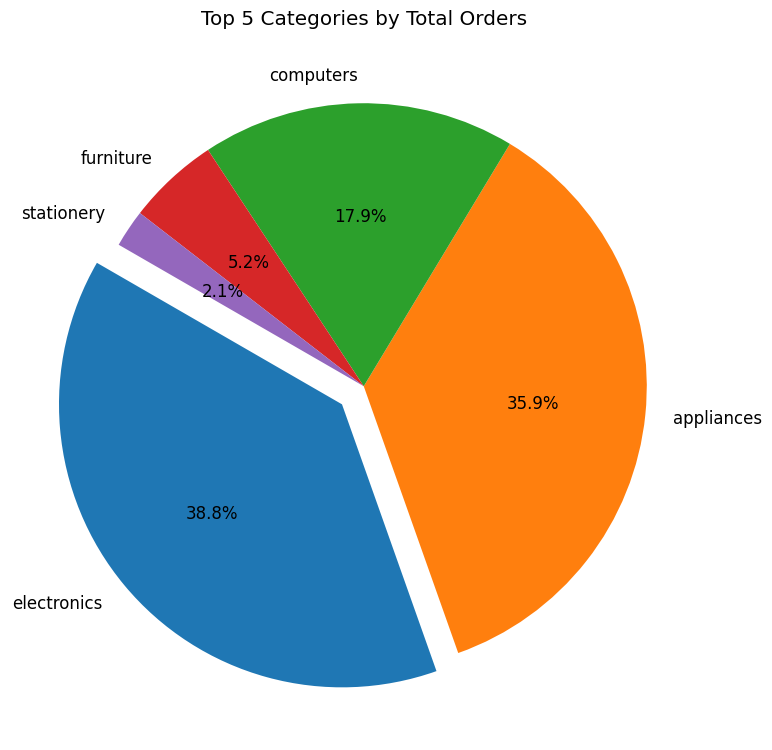

In [47]:
# plot the pie plot for the top 5 categories by orders
plt.rcParams.update({'font.size': 12, 'figure.facecolor': 'white'})
# extract the top 5 categories as labels
labels = orders_category['category'][:5]
#only explode the 1st slice i.e. electronics
explode = (0.1, 0, 0, 0, 0)

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(x=orders_category.total_orders[:5], explode=explode, labels=labels, autopct='%1.1f%%', startangle=150)

plt.title('Top 5 Categories by Total Orders')
plt.tight_layout()
plt.show()

In [48]:
# by total sales
sales_category = data[data['category'] != 'unknown'].groupby('category').agg(
    total_sales=('price', 'sum')
).reset_index().sort_values('total_sales', ascending=False).reset_index(drop=True)
sales_category.head(10)

,category,total_sales
0,electronics,56713685.46
1,appliances,27437259.95
2,computers,19242876.00
3,furniture,1022587.13
4,apparel,787574.36
5,kids,549690.68
6,construction,331910.78
7,sport,243893.92
8,auto,119889.08
9,medicine,70498.46


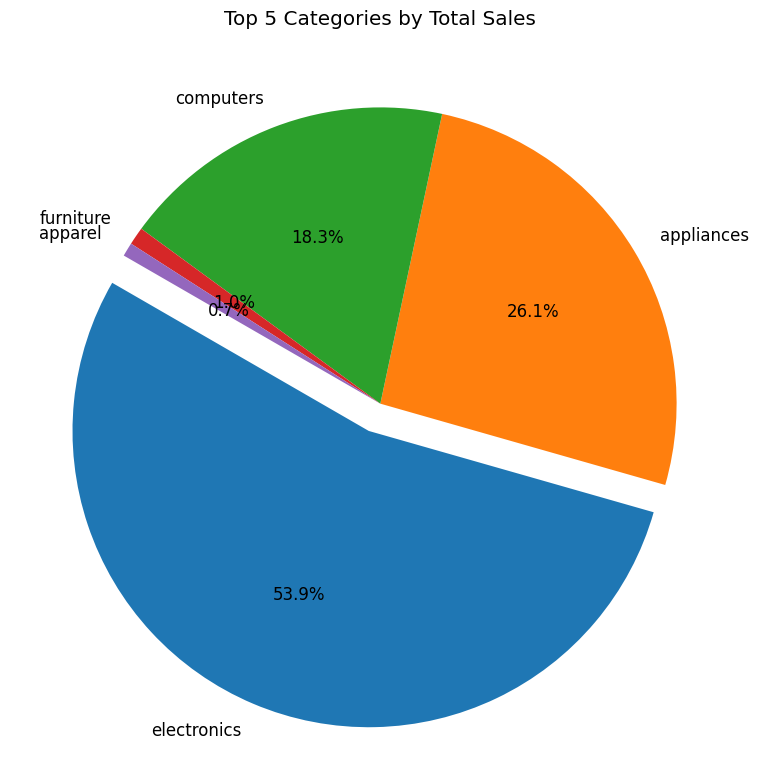

In [49]:
# Plot the pie plot for the top 5 categories by sales
# extract the top 5 categories as labels
labels = sales_category['category'][:5]
# only "explode" the 1st slice (i.e. 'electronics')
explode = (0.1, 0, 0, 0, 0)

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(x=sales_category.total_sales[:5], explode=explode, labels=labels, autopct='%1.1f%%', startangle=150)

plt.title('Top 5 Categories by Total Sales')
plt.tight_layout()
plt.show()

In [50]:
# top 10 brands
print('The total number of brands sold: ', data['brand'].nunique())

The total number of brands sold:  866


In [51]:
df_brand = data.groupby('brand').agg(
    total_users=('user_id', 'nunique'),
    total_orders = ('order_id', 'nunique'),
    total_sales = ('price', 'sum')
).reset_index().sort_values(by='total_sales', ascending=False).reset_index(drop=True)
df_brand.head(10)

,brand,total_users,total_orders,total_sales
0,samsung,35633,84685,28890299.34
1,apple,18762,34257,25929970.87
2,lg,8381,15572,7796270.97
3,asus,5711,8945,5074716.53
4,lenovo,4863,7853,4582558.86
5,bosch,4752,8419,3338757.25
6,hp,3936,6004,2496689.33
7,xiaomi,9107,14413,2390952.57
8,huawei,5722,9860,2218195.42
9,beko,4959,7300,2061907.61


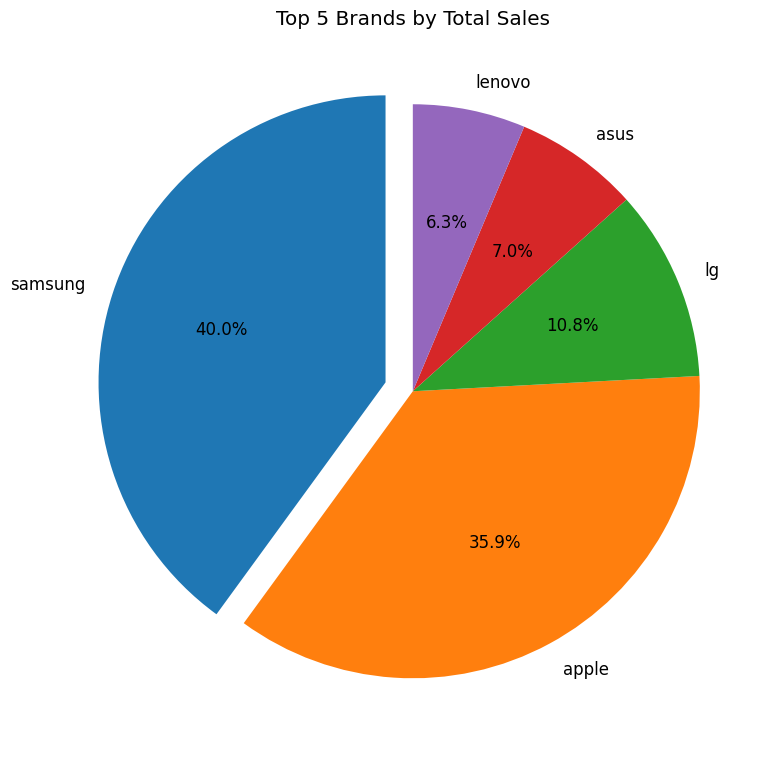

In [52]:
# Plot the pie plot for top 5 brands by sales
# extract the top 5 catories as labels
labels = df_brand['brand'][:5]
# only "explode" the 1st slice (i.e. 'Samsung')
explode = (0.1, 0, 0, 0, 0)

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(x=df_brand.total_sales[:5], explode=explode,labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Top 5 Brands by Total Sales')
plt.tight_layout()
plt.show()

In [53]:
# top 10 products
print('The total number of unique products: ', data['product'].nunique())
print('The total number of product sold: ', data['product_id'].nunique())

The total number of unique products:  124
The total number of product sold:  19053


In [54]:
df_product = data.groupby(['product', 'brand']).agg(
    total_users=('user_id', 'nunique'),
    total_orders=('order_id', 'nunique'),
    total_sales=('price', 'sum')
).reset_index().sort_values(by='total_sales', ascending=False).reset_index(drop=True)
df_product.head(10)

,product,brand,total_users,total_orders,total_sales
0,smartphone,apple,13795,23043,19163221.51
1,smartphone,samsung,23627,47792,16203110.72
2,notebook,asus,4832,7486,4699457.65
3,notebook,lenovo,4593,7430,4507154.41
4,video.tv,samsung,3640,6080,3903495.59
5,notebook,apple,1456,2249,3292571.10
6,video.tv,lg,3323,5533,3282657.46
7,kitchen.refrigerators,samsung,1995,2973,2191618.54
8,kitchen.washer,samsung,2956,4998,2058715.88
9,kitchen.washer,lg,3262,5327,1950491.25


In [55]:
df_product_1 = data[data['product'] != 'unknown'].groupby('product').agg(
    total_users=('user_id', 'nunique'),
    total_orders=('order_id', 'nunique'),
    total_sales=('price', 'sum')
).reset_index().sort_values(by='total_sales', ascending=False). reset_index(drop=True)
df_product_1.head(10)

,product,total_users,total_orders,total_sales
0,smartphone,41985,94980,41177570.76
1,notebook,12775,24617,14774573.47
2,video.tv,8645,17162,8716817.96
3,kitchen.refrigerators,10249,19248,8594453.16
4,kitchen.washer,7193,13865,4917272.74
5,environment.vacuum,7450,15427,2435306.62
6,tablet,4144,6279,2340078.84
7,clocks,3894,6197,2178261.94
8,environment.air_conditioner,4923,6933,1822777.41
9,kitchen.hood,3840,6959,1796502.32


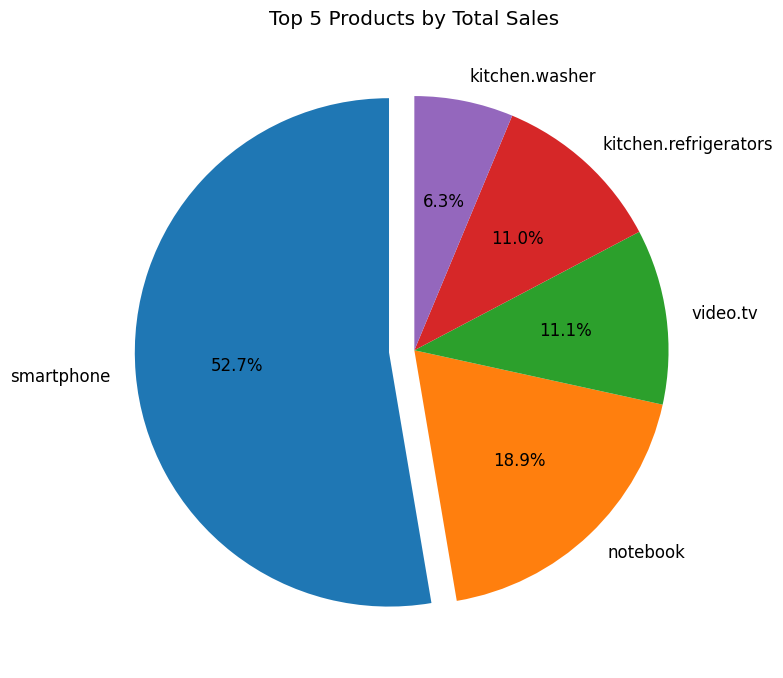

In [56]:
# Plot the pie plot for top 5 products by sales
# extract the top 5 catories as labels
labels = df_product_1['product'][:5]
# only "explode" the 1st slice (i.e. 'smartphone')
explode = (0.1, 0, 0, 0, 0)

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(x=df_product_1.total_sales[:5], explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Top 5 Products by Total Sales')
plt.tight_layout()
plt.show()

In [57]:
# Top 5 selling smart phone brands
df_smartphone = data[data['product'] == 'smartphone'].groupby('brand').agg(
    total_users=('user_id', 'nunique'),
    total_orders=('order_id', 'nunique'),
    total_sales=('price', 'sum')
).reset_index().sort_values(by='total_sales', ascending=False).reset_index(drop=True)
df_smartphone.head()

,brand,total_users,total_orders,total_sales
0,apple,13795,23043,19163221.51
1,samsung,23627,47792,16203110.72
2,huawei,4480,7386,1881632.04
3,oppo,3275,6555,1678580.92
4,xiaomi,5470,8081,1634833.59


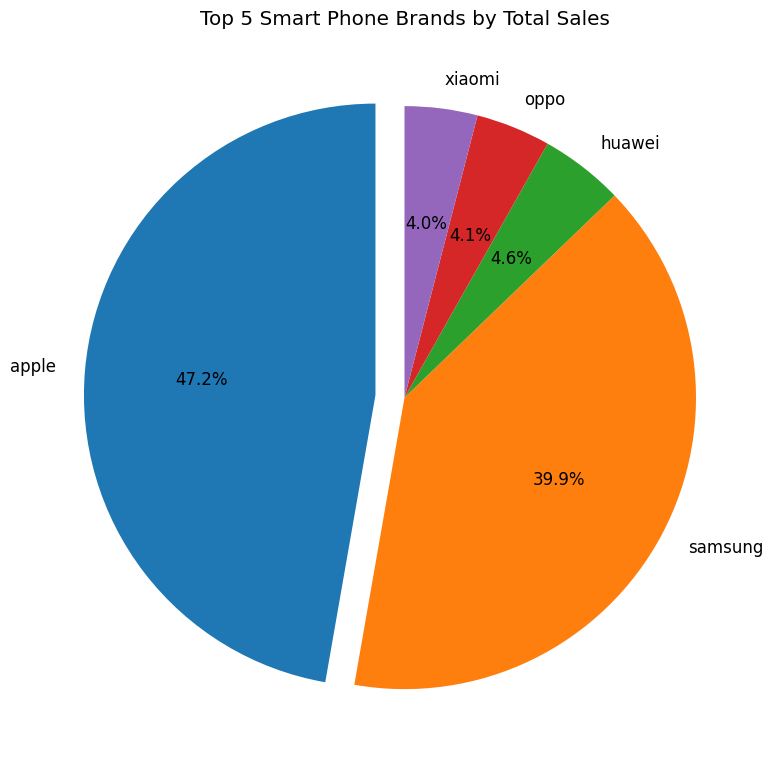

In [58]:
# Plot the top 5 smart phone brands by total sales
# Extract the top 10 category codes as labels
labels = df_smartphone.brand[:5]
# only "explode" the 1st slice (i.e. 'Apple')
explode = (0.1, 0, 0, 0, 0)

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(x=df_smartphone.total_sales[:5], explode=explode,labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Top 5 Smart Phone Brands by Total Sales')
plt.tight_layout()
plt.show()

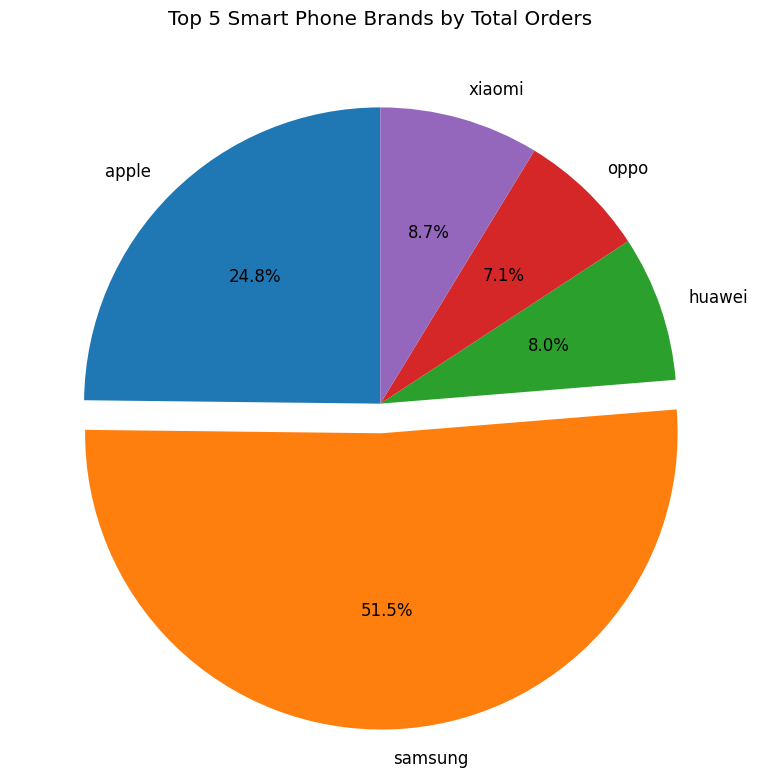

In [59]:
# Plot the top 5 smart phones by total orders
# Extract the top 10 category codes as labels
labels = df_smartphone.brand[:5]
# only "explode" the 2nd slice (i.e. 'Samsung')
explode = (0, 0.1, 0, 0, 0)

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(x=df_smartphone.total_orders[:5], explode=explode,labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Top 5 Smart Phone Brands by Total Orders')
plt.tight_layout()
plt.show()

In [60]:
# Import libraries - 2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.nonparametric.smoothers_lowess import lowess

import warnings
warnings.filterwarnings('ignore')

In [61]:
# drop all other columns except the two below
data2 = data2[['event_time', 'price']]
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633521 entries, 0 to 2633520
Data columns (total 2 columns):
 #   Column      Dtype  
---  ------      -----  
 0   event_time  object 
 1   price       float64
dtypes: float64(1), object(1)
memory usage: 40.2+ MB


In [62]:
# data preprocessing
data2 = data2.drop_duplicates()
data2.isnull().sum()

,0
event_time,0
price,241375


In [63]:
# remove rows where 'price' contains NaNs
data2 = data2[~data2['price'].isnull()]
data2

,event_time,price
0,2020-04-24 11:50:39 UTC,162.01
2,2020-04-24 14:37:43 UTC,77.52
4,2020-04-24 19:16:21 UTC,217.57
5,2020-04-26 08:45:57 UTC,39.33
6,2020-04-26 09:33:47 UTC,1387.01
...,...,...
2633516,2020-11-21 10:10:01 UTC,138.87
2633517,2020-11-21 10:10:13 UTC,418.96
2633518,2020-11-21 10:10:30 UTC,12.48
2633519,2020-11-21 10:10:30 UTC,41.64


In [64]:
data2.isnull().sum()

,0
event_time,0
price,0


In [65]:
data2.describe(include='all')

,event_time,price
count,2139643,2139643.00
unique,1299919,NaN
top,1970-01-01 00:33:40 UTC,NaN
freq,674,NaN
mean,NaN,155.76
std,NaN,243.61
min,NaN,0.00
25%,NaN,15.02
50%,NaN,57.85
75%,NaN,201.37


In [66]:
# exclude event_time rows that contain 1970
data2 = data2[~data2['event_time'].str.contains('1970')]
#remove UTC from event_time
data2['event_time'] = data2['event_time'].str.replace('UTC','')
data2.describe(include='all')

,event_time,price
count,2138969,2138969.00
unique,1299918,NaN
top,2020-04-09 16:30:01,NaN
freq,155,NaN
mean,NaN,155.71
std,NaN,243.43
min,NaN,0.00
25%,NaN,15.02
50%,NaN,57.85
75%,NaN,201.37


In [67]:
# create date column
data2['date'] = data2.event_time.apply(lambda x: x.split(' ')[0])

# convert to datetime object
data2['date'] = pd.to_datetime(data2['date'])
# delete event_time column
del data2['event_time']
data2.head()

,price,date
0,162.01,2020-04-24
2,77.52,2020-04-24
4,217.57,2020-04-24
5,39.33,2020-04-26
6,1387.01,2020-04-26


In [68]:
# create a new time series
df = data2.groupby('date').agg(sales=('price', 'sum'))
df.head()

,sales
date,
2020-01-05,1151017.74
2020-01-06,1014544.86
2020-01-07,1369143.81
2020-01-08,886054.44
2020-01-09,787447.75


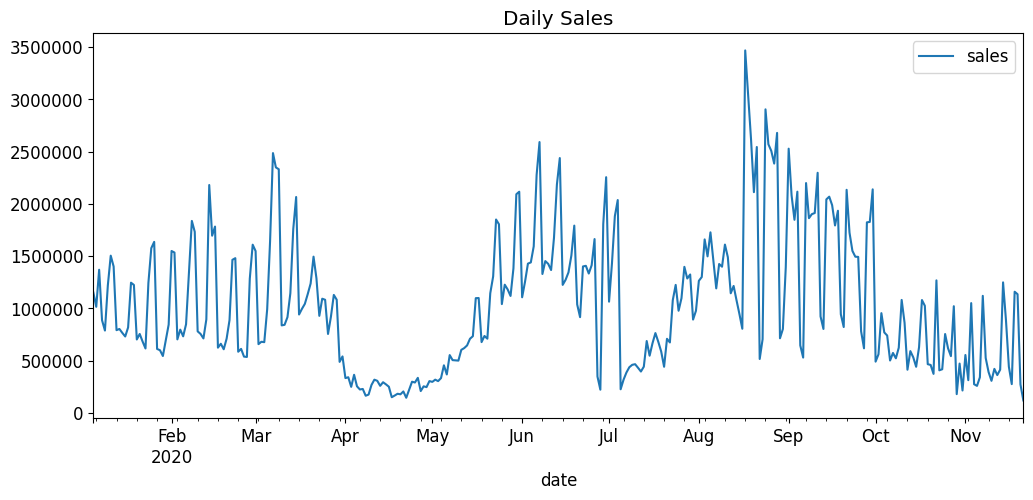

In [69]:
# visualize the time series data
fig, ax = plt.subplots()
plt.ticklabel_format(style='plain')
fig = df.plot(figsize=(12,5), ax=ax)
plt.title('Daily Sales')
plt.show()

In [70]:
# Define RFM Dataset - 1
from pandas.tseries.offsets import MonthEnd

df_data['month_key'] = df_data['event_time'].dt.month
df_data[['event_time', 'month_key']]

,event_time,month_key
0,2020-04-24 11:50:39,4
1,2020-04-24 11:50:39,4
2,2020-04-24 14:37:43,4
3,2020-04-24 14:37:43,4
4,2020-04-24 19:16:21,4
...,...,...
562857,2020-11-21 10:10:01,11
562858,2020-11-21 10:10:13,11
562859,2020-11-21 10:10:30,11
562860,2020-11-21 10:10:30,11


In [71]:
# creating a new dataframe
df_month_keys = pd.DataFrame({"month_key":df_data['month_key'].unique(), 'key':0})
df_user_ids = pd.DataFrame({"user_id":df_data['user_id'].unique(), 'key':0})

df_rfm = df_month_keys.merge(df_user_ids, on='key', how='outer')
df_rfm = df_rfm.drop(columns=['key'])
df_rfm = df_rfm.sort_values(by=['user_id', 'month_key']).reset_index(drop=True)
df_rfm

,month_key,user_id
0,1,1515915625439952128.00
1,2,1515915625439952128.00
2,3,1515915625439952128.00
3,4,1515915625439952128.00
4,5,1515915625439952128.00
...,...,...
1080679,7,1515915625514891264.00
1080680,8,1515915625514891264.00
1080681,9,1515915625514891264.00
1080682,10,1515915625514891264.00


In [72]:
# Recency
# User last month purchase
df_user_month_purchases = df_data[['month_key', 'user_id']].drop_duplicates()
df_user_month_purchases['last_purchase'] = df_user_month_purchases['month_key']

df_rfm = df_rfm.merge(df_user_month_purchases, how='left', on=['month_key', 'user_id'])

# filling the last_purchase month
user_ids = df_rfm[['user_id']]
df_rfm = df_rfm.groupby('user_id').ffill()
df_rfm['R_months_since_last_purchase'] = df_rfm['month_key'] - df_rfm['last_purchase']
df_rfm['user_id'] = user_ids
df_rfm.head(20)

,month_key,last_purchase,R_months_since_last_purchase,user_id
0,1,NaN,NaN,1515915625439952128.00
1,2,NaN,NaN,1515915625439952128.00
2,3,NaN,NaN,1515915625439952128.00
3,4,NaN,NaN,1515915625439952128.00
4,5,NaN,NaN,1515915625439952128.00
5,6,NaN,NaN,1515915625439952128.00
6,7,7.00,0.00,1515915625439952128.00
7,8,7.00,1.00,1515915625439952128.00
8,9,7.00,2.00,1515915625439952128.00
9,10,7.00,3.00,1515915625439952128.00


In [73]:
# Frequency
# user last month purchase order count
df_user_month_purchases = df_data.groupby(['month_key', 'user_id'])['order_id'].nunique().reset_index()
df_rfm = df_rfm.merge(df_user_month_purchases, how='left', on=['month_key', 'user_id'])

# filling the last_purchase month
user_ids = df_rfm[['user_id']]
df_rfm = df_rfm.groupby('user_id').ffill()
df_rfm['user_id'] = user_ids
df_rfm = df_rfm.rename(columns={"order_id":"F_last_monthly_purchases_count"})
df_rfm.head(20)

,month_key,last_purchase,R_months_since_last_purchase,F_last_monthly_purchases_count,user_id
0,1,NaN,NaN,NaN,1515915625439952128.00
1,2,NaN,NaN,NaN,1515915625439952128.00
2,3,NaN,NaN,NaN,1515915625439952128.00
3,4,NaN,NaN,NaN,1515915625439952128.00
4,5,NaN,NaN,NaN,1515915625439952128.00
5,6,NaN,NaN,NaN,1515915625439952128.00
6,7,7.00,0.00,1.00,1515915625439952128.00
7,8,7.00,1.00,1.00,1515915625439952128.00
8,9,7.00,2.00,1.00,1515915625439952128.00
9,10,7.00,3.00,1.00,1515915625439952128.00


In [74]:
# Monetary
# user last monthly purchase value
df_user_month_purchases = df_data.groupby(['month_key','user_id'])['price'].sum().reset_index()
df_rfm=df_rfm.merge(df_user_month_purchases, how='left', on=['month_key','user_id'])

# fill in  last purchase month
user_ids = df_rfm[['user_id']]
df_rfm = df_rfm.groupby('user_id').ffill()
df_rfm['user_id'] = user_ids
df_rfm = df_rfm.rename(columns={"price":"M_last_monthly_purchases_value"})
df_rfm.head(20)

,month_key,last_purchase,R_months_since_last_purchase,F_last_monthly_purchases_count,M_last_monthly_purchases_value,user_id
0,1,NaN,NaN,NaN,NaN,1515915625439952128.00
1,2,NaN,NaN,NaN,NaN,1515915625439952128.00
2,3,NaN,NaN,NaN,NaN,1515915625439952128.00
3,4,NaN,NaN,NaN,NaN,1515915625439952128.00
4,5,NaN,NaN,NaN,NaN,1515915625439952128.00
5,6,NaN,NaN,NaN,NaN,1515915625439952128.00
6,7,7.00,0.00,1.00,416.64,1515915625439952128.00
7,8,7.00,1.00,1.00,416.64,1515915625439952128.00
8,9,7.00,2.00,1.00,416.64,1515915625439952128.00
9,10,7.00,3.00,1.00,416.64,1515915625439952128.00


In [75]:
# define RFM dataframe
# drop all missing values
df_rfm = df_rfm.dropna()
df_rfm = df_rfm[['user_id','month_key','R_months_since_last_purchase','F_last_monthly_purchases_count', 'M_last_monthly_purchases_value']]
df_rfm

,user_id,month_key,R_months_since_last_purchase,F_last_monthly_purchases_count,M_last_monthly_purchases_value
6,1515915625439952128.00,7,0.00,1.00,416.64
7,1515915625439952128.00,8,1.00,1.00,416.64
8,1515915625439952128.00,9,2.00,1.00,416.64
9,1515915625439952128.00,10,3.00,1.00,416.64
10,1515915625439952128.00,11,4.00,1.00,416.64
...,...,...,...,...,...
1080639,1515915625514887424.00,11,0.00,1.00,208.31
1080650,1515915625514887936.00,11,0.00,1.00,3472.20
1080661,1515915625514888704.00,11,0.00,3.00,752.49
1080672,1515915625514891008.00,11,0.00,1.00,925.67


In [76]:
# visualizing PCA - Prinicpal Component Analysis
from sklearn.decomposition import PCA
X = df_rfm[['R_months_since_last_purchase','F_last_monthly_purchases_count','M_last_monthly_purchases_value']]
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(X_pca, columns=['pca_1','pca_2'])
df_pca

,pca_1,pca_2
0,-146.08,-0.39
1,-146.08,-0.38
2,-146.08,-0.37
3,-146.08,-0.36
4,-146.08,-0.35
...,...,...
496499,-354.41,0.30
496500,2909.47,-10.52
496501,189.78,0.50
496502,362.95,-2.07


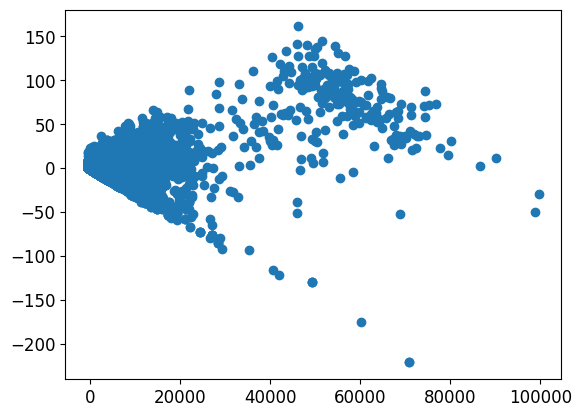

In [77]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(df_pca['pca_1'], df_pca['pca_2'])
plt.show()

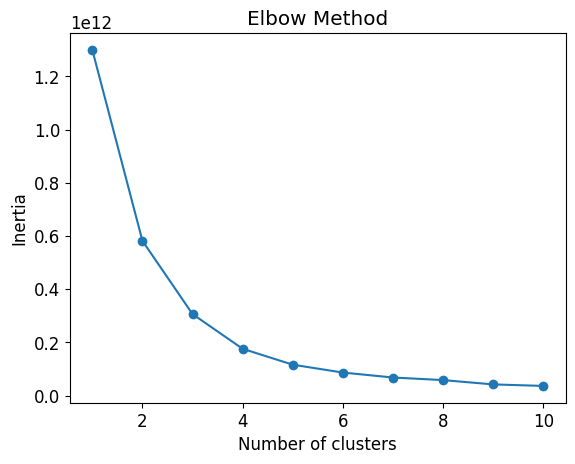

In [78]:
# K means clustering
from sklearn.cluster import KMeans
inertias = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  inertias.append(kmeans.inertia_)
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

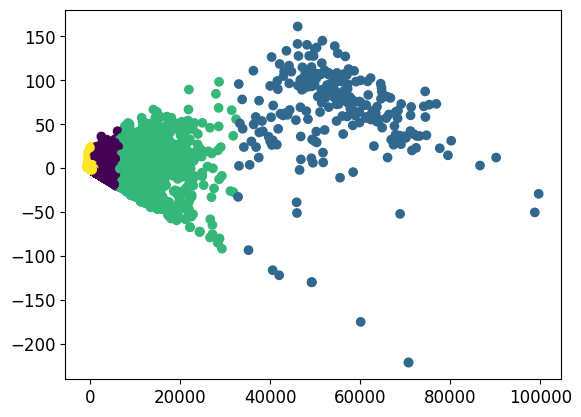

In [79]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_pca)
plt.scatter(df_pca['pca_1'], df_pca['pca_2'], c=kmeans.labels_)
plt.show()

In [80]:
# Analyze results of clustering
df_rfm['kmeans_labels'] = kmeans.labels_
df_rfm.groupby('kmeans_labels')[['R_months_since_last_purchase','F_last_monthly_purchases_count','M_last_monthly_purchases_value']].agg({"mean","count"})


R_months_since_last_purchase       \
                                     count mean   
kmeans_labels                                     
0                                    44097 1.23   
1                                      237 0.02   
2                                     2024 0.73   
3                                   450146 1.74   

              F_last_monthly_purchases_count         \
                                       count   mean   
kmeans_labels                                         
0                                      44097   4.06   
1                                        237 244.30   
2                                       2024  27.08   
3                                     450146   1.40   

              M_last_monthly_purchases_value           
                                       count     mean  
kmeans_labels                                          
0                                      44097  2363.64  
1                                        237 55319.63  
2                                       2024 11454.81  
3                                     450146   308.49

In [81]:
# Machine Learning
# limiting the data in the dataset to perform machine learning operation with limited resources used
df = data3.head(1000)
df

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2268105426648171008.00,electronics.tablet,samsung,162.01,1515915625441993984.00
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2268105426648171008.00,electronics.tablet,samsung,162.01,1515915625441993984.00
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2268105430162997760.00,electronics.audio.headphone,huawei,77.52,1515915625447879424.00
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2268105430162997760.00,electronics.audio.headphone,huawei,77.52,1515915625447879424.00
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2268105471367840000.00,NaN,karcher,217.57,1515915625443148032.00
...,...,...,...,...,...,...,...,...
995,2020-05-01 06:13:19 UTC,2299263580689662910,1515966223509259066,2268105389956399872.00,appliances.kitchen.washer,beko,203.68,1515915625452567552.00
996,2020-05-01 06:14:11 UTC,2299264013382452202,1515966223509127712,2268105409048870912.00,computers.network.router,mercusys,16.88,1515915625450635776.00
997,2020-05-01 06:15:29 UTC,2299264670051074093,1515966223509088532,2268105428166509056.00,electronics.smartphone,samsung,300.90,1515915625452816896.00
998,2020-05-01 06:16:16 UTC,2299265061060870223,1515966223509088671,2268105428166509056.00,electronics.smartphone,apple,925.67,1515915625452309248.00


In [82]:
# Inspect the dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   event_time     1000 non-null   object 
 1   order_id       1000 non-null   int64  
 2   product_id     1000 non-null   int64  
 3   category_id    1000 non-null   float64
 4   category_code  784 non-null    object 
 5   brand          950 non-null    object 
 6   price          1000 non-null   float64
 7   user_id        1000 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 62.6+ KB
None
                event_time             order_id           product_id  \
0  2020-04-24 11:50:39 UTC  2294359932054536986  1515966223509089906   
1  2020-04-24 11:50:39 UTC  2294359932054536986  1515966223509089906   
2  2020-04-24 14:37:43 UTC  2294444024058086220  2273948319057183658   
3  2020-04-24 14:37:43 UTC  2294444024058086220  2273948319057183658   
4  2020-04-24 19:16:21 UTC 

In [83]:
# Preprocess data
df = df.dropna(subset=['user_id', 'product_id', 'price'])  # Drop rows with missing user_id, product_id, or price
df['user_id'] = df['user_id'].astype(int)
df['product_id'] = df['product_id'].astype(int)

In [84]:
# added code
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   event_time     1000 non-null   object 
 1   order_id       1000 non-null   int64  
 2   product_id     1000 non-null   int64  
 3   category_id    1000 non-null   float64
 4   category_code  784 non-null    object 
 5   brand          950 non-null    object 
 6   price          1000 non-null   float64
 7   user_id        1000 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [85]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
event_time,1000,768,2020-04-30 05:04:53 UTC,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_id,1000.00,NaN,NaN,NaN,2298508537828504320.00,534154845575678.44,2294359932054536960.00,2298235654185681152.00,2298593680941908480.00,2298773155738550528.00,2299265304112398336.00
product_id,1000.00,NaN,NaN,NaN,1682746760108694272.00,314195454751919104.00,1515966223509088512.00,1515966223509104128.00,1515966223509128704.00,1515966223510175488.00,2298437347152233472.00
category_id,1000.00,NaN,NaN,NaN,2271408141487000832.00,17726960141293160.00,2268105388421284352.00,2268105406549066752.00,2268105427528974848.00,2268105439247860480.00,2374498914001945600.00
category_code,784,67,electronics.smartphone,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,950,150,samsung,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,1000.00,NaN,NaN,NaN,120.02,199.79,0.02,15.02,41.18,138.87,1433.54
user_id,1000.00,NaN,NaN,NaN,1515915625449569536.00,7989943.87,1515915625440946432.00,1515915625444090624.00,1515915625451324416.00,1515915625452531968.00,1515915625514808064.00


In [86]:
# Data preprocessing
df = df.drop_duplicates()
df.isnull().sum()

,0
event_time,0
order_id,0
product_id,0
category_id,0
category_code,213
brand,49
price,0
user_id,0


In [87]:
# exclude rows where 'event_time' contains '1970'
df = df[~df['event_time'].str.contains('1970')]
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
event_time,984,768,2020-04-30 05:04:53 UTC,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_id,984.00,NaN,NaN,NaN,2298536380355673856.00,464266743452000.88,2294359932054536960.00,2298241357954679296.00,2298596089420317440.00,2298773366724624640.00,2299265304112398336.00
product_id,984.00,NaN,NaN,NaN,1681607103947265536.00,313424977112442944.00,1515966223509088512.00,1515966223509104128.00,1515966223509128704.00,1515966223510174720.00,2298437347152233472.00
category_id,984.00,NaN,NaN,NaN,2271353720612105216.00,17560725358318130.00,2268105388421284352.00,2268105406549066752.00,2268105427528974848.00,2268105439247860480.00,2374498914001945600.00
category_code,771,67,electronics.smartphone,109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,935,150,samsung,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,984.00,NaN,NaN,NaN,116.51,188.58,0.02,15.02,39.33,138.69,1433.54
user_id,984.00,NaN,NaN,NaN,1515915625449587712.00,8042060.83,1515915625440946432.00,1515915625444090624.00,1515915625451425024.00,1515915625452531968.00,1515915625514808064.00


In [88]:
# remove empty rows in brand and user_id columns
df = df.dropna(subset=['brand', 'user_id']).reset_index(drop=True)
df.isnull().sum()

,0
event_time,0
order_id,0
product_id,0
category_id,0
category_code,197
brand,0
price,0
user_id,0


In [89]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from surprise import SVD, Dataset, Reader, KNNBasic
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
# Create train-test split for collaborative filtering
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [90]:
# Collaborative Filtering
# Convert to Surprise format
reader = Reader(rating_scale=(df['price'].min(), df['price'].max()))
data = Dataset.load_from_df(df[['user_id', 'product_id', 'price']], reader)
trainset = data.build_full_trainset()

In [91]:
# Use SVD for collaborative filtering
collab_model = SVD()
collab_model.fit(trainset)

In [92]:
print("Unique product IDs:", df['product_id'].unique())

Unique product IDs: [1515966223509089906 2273948319057183658 2273948316817424439
 1515966223509261697 1515966223509104892 2273948311742316796
 1515966223509259473 2273948308663698152 1515966223509089660
 1515966223509104683 1515966223509089780 2273948222957290212
 2273948303177548033 1515966223509105105 1515966223509088578
 1515966223510177666 1515966223509382310 1515966223509104759
 1515966223509881617 1515966223509088613 1515966223509089486
 1515966223509259423 1515966223509088635 1515966223509123236
 1515966223509127751 1515966223509302893 1515966223509089076
 2273948319115903999 2273948186710114818 1515966223509089514
 1515966223509117349 2273948241915544394 1515966223509616430
 1515966223509107888 1515966223509088628 1515966223509262208
 1515966223509089836 1515966223509106817 2273948312304353950
 1515966223509382227 1515966223509090139 2273948308663698149
 1515966223509127651 1515966223509260344 1515966223509130844
 1515966223509105072 1515966223509090092 1515966223509283414
 151

In [93]:
print("Unique users IDs:", df['user_id'].unique())

Unique users IDs: [1515915625441993984 1515915625447879424 1515915625443148032
 1515915625450382848 1515915625448766464 1515915625450561280
 1515915625446798336 1515915625450899456 1515915625451131648
 1515915625451212800 1515915625443158784 1515915625442675200
 1515915625450916864 1515915625441708288 1515915625451641600
 1515915625451580672 1515915625447631104 1515915625452042752
 1515915625455105280 1515915625441483520 1515915625448293120
 1515915625441507840 1515915625450210816 1515915625442449920
 1515915625446427392 1515915625452188672 1515915625452153344
 1515915625445931008 1515915625452130048 1515915625444748032
 1515915625452193280 1515915625452195840 1515915625447655424
 1515915625441373440 1515915625443079168 1515915625448248320
 1515915625445024256 1515915625441043712 1515915625452198656
 1515915625449928960 1515915625452192512 1515915625451999744
 1515915625452171520 1515915625449402624 1515915625445675776
 1515915625452183552 1515915625452211456 1515915625452200704
 15159

In [94]:
# Test on a sample user-product pair
pred = collab_model.predict(uid=1515915625441990000, iid=1515966223509089906)
print(f"Collaborative Filtering Prediction: {pred.est}")

Collaborative Filtering Prediction: 122.59353994608634


In [116]:
testset = [tuple(x) for x in test_data[['user_id', 'product_id', 'price']].to_numpy()]

# Generate predictions for the testset
predictions = collab_model.test(testset)
true_ratings = [pred.r_ui for pred in predictions]  # True ratings
predicted_ratings = [pred.est for pred in predictions]  # Predicted ratings
rmse = np.sqrt(mean_squared_error(true_ratings, predicted_ratings))
print(f"RMSE: {rmse}")

RMSE: 313.0355957469271


In [95]:
# Content-Based Filtering
# Combine category_code and brand for content-based features
df['content'] = df['category_code'].fillna('') + " " + df['brand'].fillna('')

In [96]:
# Use TF-IDF to vectorize content
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['content'])

In [97]:
# Function to compute similarity on-the-fly
def content_based_recommendations_on_the_fly(product_id, top_n=5):
    # idx = df[df['product_id'] == product_id].index[0]
    if product_id not in df['product_id'].values:
        return []
    indices = df.index[df['product_id'] == product_id].tolist()
    if not indices:
        return []
    idx = indices[0]
    product_vector = tfidf_matrix[idx]
    sim_scores = linear_kernel(product_vector, tfidf_matrix).flatten()
    sim_scores = [(i, score) for i, score in enumerate(sim_scores)]
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n + 1]
    product_indices = [i[0] for i in sim_scores]
    return df.iloc[product_indices]['product_id'].tolist()

# Test content-based filtering
print("Content-Based Recommendations:", content_based_recommendations_on_the_fly(product_id=1515966223509089906))

Content-Based Recommendations: [1515966223509106817, 1515966223509106817, 1515966223509089673, 1515966223509089673, 2273948222336532851]


In [98]:
from sklearn.neighbors import NearestNeighbors

# Train a nearest neighbor model
nn = NearestNeighbors(metric='cosine', algorithm='brute')
nn.fit(tfidf_matrix)

# Function to get recommendations
def ann_recommendations(product_id, top_n=5):
    idx = df[df['product_id'] == product_id].index[0]
    distances, indices = nn.kneighbors(tfidf_matrix[idx], n_neighbors=top_n + 1)
    return df.iloc[indices.flatten()[1:]]['product_id'].tolist()

# Test ANN recommendations
print("ANN Content-Based Recommendations:", ann_recommendations(product_id=1515966223509089906))

ANN Content-Based Recommendations: [1515966223509130229, 1515966223509089906, 2273948222336532851, 1515966223509106817, 1515966223509089673]


In [119]:
# RMSE Calculation for Content-Based Filtering
def predict_rating(user_id, product_id, tfidf_matrix, df):
    if product_id not in df['product_id'].values:
        return np.nan  # No prediction available
    indices = df.index[df['product_id'] == product_id].tolist()
    if not indices:
        return np.nan
    idx = indices[0]
    product_vector = tfidf_matrix[idx]
    sim_scores = linear_kernel(product_vector, tfidf_matrix).flatten()

    # User's rated products
    user_ratings = df[df['user_id'] == user_id]
    if user_ratings.empty:
        return np.nan  # No prediction available

    # Calculate weighted average rating
    weighted_sum = 0
    sim_sum = 0
    for _, row in user_ratings.iterrows():
        rated_product_idx = df.index[df['product_id'] == row['product_id']].tolist()
        if rated_product_idx:
            similarity = sim_scores[rated_product_idx[0]]
            weighted_sum += similarity * row['price']
            sim_sum += similarity

    return weighted_sum / sim_sum if sim_sum > 0 else np.nan

# Apply predictions for each user-product pair in the dataset
df['predicted_rating'] = df.apply(
    lambda x: predict_rating(x['user_id'], x['product_id'], tfidf_matrix, df), axis=1
)

# Drop rows with NaN predictions
df_filtered = df.dropna(subset=['predicted_rating'])

# Calculate RMSE
true_ratings = df_filtered['price'].to_numpy()
predicted_ratings = df_filtered['predicted_rating'].to_numpy()
rmse = np.sqrt(mean_squared_error(true_ratings, predicted_ratings))

print(f"RMSE for Content-Based Filtering: {rmse}")

RMSE for Content-Based Filtering: 31.129597611511052


In [99]:
# Hybrid Recommendation
# Weighted average of collaborative and content-based recommendations
def hybrid_recommendations(user_id, product_id, top_n=5):
    # Collaborative prediction
    collab_pred = collab_model.predict(uid=user_id, iid=product_id).est

    # Content-based recommendations
    content_recs = content_based_recommendations_on_the_fly(product_id, top_n=top_n)

    # Combine recommendations
    recommendations = [(prod_id, collab_pred) for prod_id in content_recs]
    return sorted(recommendations, key=lambda x: x[1], reverse=True)

# Test hybrid recommendation
print("Hybrid Recommendations:", hybrid_recommendations(user_id=1515915625441990000, product_id=1515966223509089906))

Hybrid Recommendations: [(1515966223509106817, 122.59353994608634), (1515966223509106817, 122.59353994608634), (1515966223509089673, 122.59353994608634), (1515966223509089673, 122.59353994608634), (2273948222336532851, 122.59353994608634)]


In [100]:
# Performance Metrics
def evaluate_models(test_data, collab_model, top_n=5):
    metrics = {"accuracy": {}, "diversity": {}, "engagement": {}}

    #Accuracy
    # Collaborative Filtering Evaluation
    collab_preds = []
    for _, row in test_data.iterrows():
        pred = collab_model.predict(uid=row['user_id'], iid=row['product_id']).est
        collab_preds.append(pred)
    metrics["accuracy"]["collaborative"] = np.sqrt(mean_squared_error(test_data['price'], collab_preds))

    # Content-Based Evaluation
    content_preds = []
    for _, row in test_data.iterrows():
        recs = content_based_recommendations_on_the_fly(row['product_id'], top_n=top_n)
        content_preds.append(row['product_id'] in recs)
    metrics["accuracy"]["content-based"] = np.mean(content_preds)

    # Hybrid Evaluation
    hybrid_preds = []
    for _, row in test_data.iterrows():
        recs = hybrid_recommendations(row['user_id'], row['product_id'], top_n=top_n)
        hybrid_preds.append(any(r[0] == row['product_id'] for r in recs))
    metrics["accuracy"]["hybrid"] = np.mean(hybrid_preds)

    # # Diversity (unique recommendations for a sample of users)
    sample_users = test_data['user_id'].sample(n=100, random_state=42).unique()
    diversity_scores = {
        "collaborative": len(set(collab_model.predict(uid=u, iid=i).iid for u in sample_users for i in range(top_n))),
        "content-based": len(set(i for user in sample_users for i in content_based_recommendations_on_the_fly(user, top_n=top_n))),
        "hybrid": 0,
        # "hybrid": len(set(i for user in sample_users for i in hybrid_recommendations(user, i, top_n=top_n))),
    }
    metrics["diversity"] = diversity_scores

    # Engagement (average number of recommendations per user)
    engagement_scores = {
        "collaborative": np.mean([len([collab_model.predict(uid=u, iid=i).iid for i in range(top_n)]) for u in sample_users]),
        "content-based": np.mean([len(content_based_recommendations_on_the_fly(i, top_n=top_n)) for i in sample_users]),
        "hybrid": np.mean([len(hybrid_recommendations(u, i, top_n=top_n)) for u in sample_users for i in range(top_n)]),
    }
    metrics["engagement"] = engagement_scores

    return metrics

# Evaluate and print metrics
metrics = evaluate_models(test_data, collab_model)
print("Performance Metrics:", metrics)

Performance Metrics: {'accuracy': {'collaborative': 282.89289670768693, 'content-based': 0.5508021390374331, 'hybrid': 0.5508021390374331}, 'diversity': {'collaborative': 5, 'content-based': 0, 'hybrid': 0}, 'engagement': {'collaborative': 5.0, 'content-based': 0.0, 'hybrid': 0.0}}
